<a href="https://colab.research.google.com/github/hemil19/DataScience-3/blob/master/ArimaModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mydatats=pd.read_csv('/content/oilpriceindex.csv',index_col='DATE',infer_datetime_format=True,parse_dates=True)
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,NaN,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


In [ ]:
len(mydatats.index)

361

In [ ]:
mydatats.index=pd.date_range('1990-01-01',periods=361,freq='M')

In [ ]:
mydatats.isnull().sum()

WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [ ]:
mydatats=mydatats.fillna(method='ffill')

In [ ]:
mydatats.isnull().sum()

WTI      0
BRENT    0
INR      0
NIFTY    0
dtype: int64

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
1990-01-31,22.86,21.25,35.6,0.44
1990-02-28,22.11,19.81,35.6,2.45
1990-03-31,22.11,18.39,35.9,-0.28
1990-04-30,18.43,16.61,36.3,-6.18
1990-05-31,18.20,16.35,36.3,-1.62


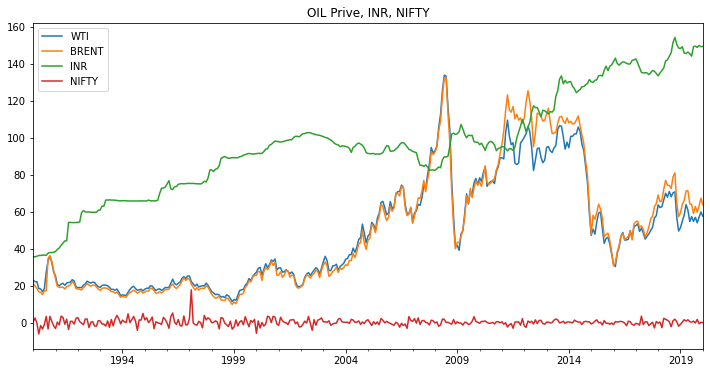

In [ ]:
mydatats.plot(figsize = (12,6), title = "OIL Prive, INR, NIFTY")
plt.show()

In [ ]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY
count,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.157922,96.245983,0.189557
std,29.185056,32.851631,28.148450,1.889088
min,11.350000,9.820000,35.600000,-6.180000
25%,21.300000,19.570000,75.500000,-0.790000
50%,40.780000,39.950000,95.100000,0.180000
75%,68.060000,70.760000,113.800000,1.080000
max,133.880000,132.720000,154.300000,17.740000


#Splitting the data into train and test

In [ ]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
import statsmodels.api as sm
from statsmodels.tsa.seasonal import  seasonal_decompose

In [ ]:
mydatats.index

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31',
               ...
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', length=361, freq='M')

In [ ]:
import statsmodels.tsa.stattools as sts
sts.adfuller(mydatats['INR'],autolag='AIC')

(-1.1290406537170836,
 0.7033530053152008,
 1,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1332.3497409741647)

It indicates INR series is not stationary

In [ ]:
#Lets take 1st difference wrt INR series
mydatats['INR_diff']=mydatats.INR.diff()
mydatats['INR_diff'].fillna(method='bfill',inplace=True)
mydatats.head()

,WTI,BRENT,INR,NIFTY,INR_diff
1990-01-31,22.86,21.25,35.6,0.44,0.0
1990-02-28,22.11,19.81,35.6,2.45,0.0
1990-03-31,22.11,18.39,35.9,-0.28,0.3
1990-04-30,18.43,16.61,36.3,-6.18,0.4
1990-05-31,18.20,16.35,36.3,-1.62,0.0


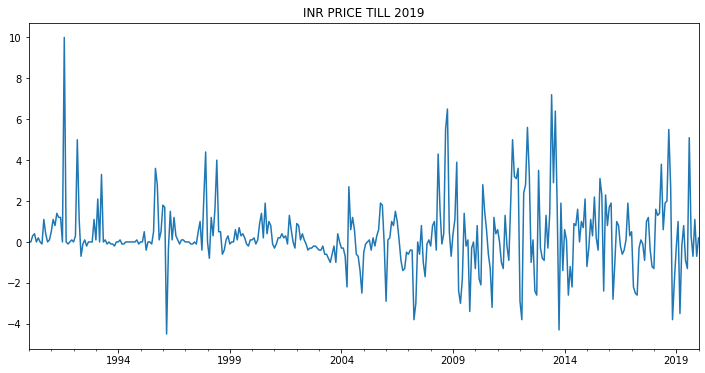

In [ ]:
mydatats['INR_diff'].plot(figsize=(12,6),title="INR PRICE TILL 2019")

In [ ]:
sts.adfuller(mydatats['INR_diff'],autolag='AIC')

(-14.704565434561802,
 2.9110455754558774e-27,
 0,
 360,
 {'1%': -3.448645946352023,
  '10%': -2.5710650077160495,
  '5%': -2.869602139060357},
 1331.402676668321)

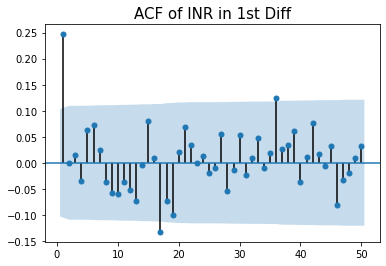

In [ ]:
sgt.plot_acf(mydatats.INR.diff().dropna(), lags= 50, zero= False)
plt.title("ACF of INR in 1st Diff", size = 15)
plt.show()

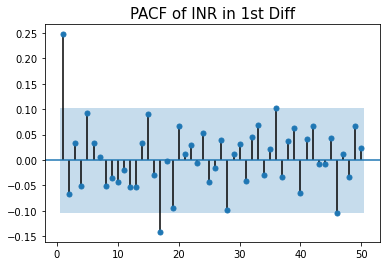

In [ ]:
sgt.plot_pacf(mydatats.INR.diff().dropna(), lags= 50, zero= False)
plt.title("PACF of INR in 1st Diff", size = 15)
plt.show()

In [ ]:
mydatats_train=mydatats[mydatats.index<='2018-12-01']['INR_diff']
mydatats_test=mydatats[mydatats.index>'2018-12-01']['INR_diff']

In [ ]:
mydatats_train.tail()

2018-07-31    1.9
2018-08-31    2.0
2018-09-30    5.5
2018-10-31    2.7
2018-11-30   -3.8
Freq: M, Name: INR_diff, dtype: float64

In [ ]:
mydatats_test.head()

2018-12-31   -1.9
2019-01-31   -0.3
2019-02-28    1.0
2019-03-31   -3.5
2019-04-30   -0.2
Freq: M, Name: INR_diff, dtype: float64

#AR-MA Model

In [ ]:
from statsmodels.tsa.arima_model import ARMA 

In [ ]:
result_ar1=ARMA(mydatats_train,order=(1,0)).fit()
print(result_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  347
Model:                     ARMA(1, 0)   Log Likelihood                -660.143
Method:                       css-mle   S.D. of innovations              1.622
Date:                Fri, 11 Sep 2020   AIC                           1326.285
Time:                        16:39:07   BIC                           1337.833
Sample:                    01-31-1990   HQIC                          1330.883
                         - 11-30-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3266      0.118      2.771      0.006       0.096       0.558
ar.L1.INR_diff     0.2621      0.052      5.021      0.000       0.160       0.364
                                    

In [ ]:
result_ma1=ARMA(mydatats_train,order=(0,1)).fit()
print(result_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  347
Model:                     ARMA(0, 1)   Log Likelihood                -659.261
Method:                       css-mle   S.D. of innovations              1.617
Date:                Fri, 11 Sep 2020   AIC                           1324.522
Time:                        16:39:11   BIC                           1336.070
Sample:                    01-31-1990   HQIC                          1329.120
                         - 11-30-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3273      0.111      2.936      0.004       0.109       0.546
ma.L1.INR_diff     0.2847      0.054      5.311      0.000       0.180       0.390
                                    

In [ ]:
result_ar1ma1=ARMA(mydatats_train,order=(1,1)).fit()
print(result_ar1ma1.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  347
Model:                     ARMA(1, 1)   Log Likelihood                -659.229
Method:                       css-mle   S.D. of innovations              1.617
Date:                Fri, 11 Sep 2020   AIC                           1326.458
Time:                        16:39:14   BIC                           1341.855
Sample:                    01-31-1990   HQIC                          1332.589
                         - 11-30-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3277      0.110      2.991      0.003       0.113       0.542
ar.L1.INR_diff    -0.0738      0.298     -0.248      0.805      -0.658       0.510
ma.L1.INR_diff     0.3554      0.286

In [ ]:
print("AR(1,0): LL= ", round(result_ar1.llf,3), "\t AIC = ", round(result_ar1.aic,3))
print("MA(0,1): LL= ", round(result_ma1.llf,3), "\t AIC = ", round(result_ma1.aic,3))
print("ARMA(1,1): LL= ", round(result_ar1ma1.llf,3), "\t AIC = ", round(result_ar1ma1.aic,3))

AR(1,0): LL=  -660.143 	 AIC =  1326.285
MA(0,1): LL=  -659.261 	 AIC =  1324.522
ARMA(1,1): LL=  -659.229 	 AIC =  1326.458


#MA1 seems to be best model

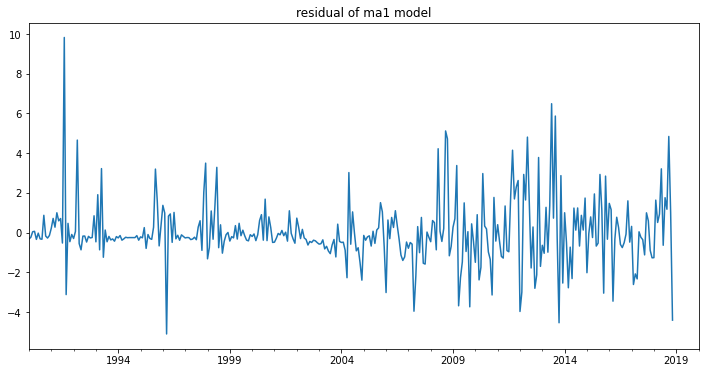

In [ ]:
mydatats['ma1_residual']=result_ma1.resid
mydatats['ma1_residual'].plot(figsize=(12,6),title='residual of ma1 model')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


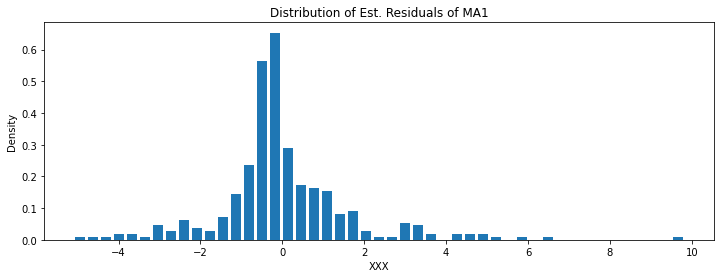

In [ ]:
plt.figure(figsize=(12,4))
plt.hist(mydatats.ma1_residual[:], bins="auto", density = True, rwidth= 0.8, label = 'Resid')

plt.xlabel("XXX")
plt.ylabel("Density")
plt.title("Distribution of Est. Residuals of MA1")
plt.show()

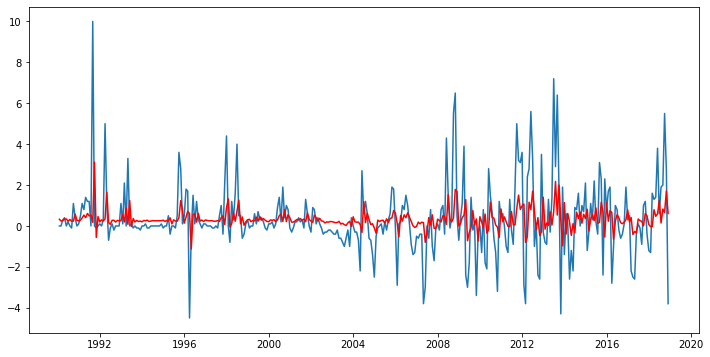

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(mydatats_train)
plt.plot(result_ma1.fittedvalues, color='red')
plt.show()

#Compare the. fitted model with. mse

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("MSE of MA1: " +str(round(mean_squared_error(mydatats_train, result_ma1.fittedvalues),4)))

MSE of MA1: 2.616


In [ ]:
print(result_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  347
Model:                     ARMA(0, 1)   Log Likelihood                -659.261
Method:                       css-mle   S.D. of innovations              1.617
Date:                Fri, 11 Sep 2020   AIC                           1324.522
Time:                        16:39:33   BIC                           1336.070
Sample:                    01-31-1990   HQIC                          1329.120
                         - 11-30-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3273      0.111      2.936      0.004       0.109       0.546
ma.L1.INR_diff     0.2847      0.054      5.311      0.000       0.180       0.390
                                    

#Forecasting for test set

In [ ]:
mydatats_test

2018-12-31   -1.9
2019-01-31   -0.3
2019-02-28    1.0
2019-03-31   -3.5
2019-04-30   -0.2
2019-05-31    0.8
2019-06-30   -0.9
2019-07-31   -1.3
2019-08-31    5.1
2019-09-30    0.3
2019-10-31   -0.7
2019-11-30    1.1
2019-12-31   -0.7
2020-01-31    0.2
Freq: M, Name: INR_diff, dtype: float64

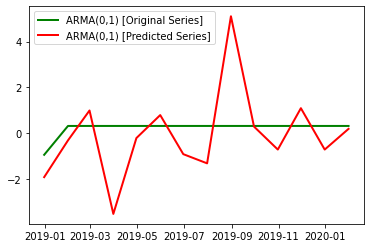

In [ ]:
forecast_ma1=result_ma1.predict(start="2018-12-31",end="2020-01-31")
plt.plot(forecast_ma1, color = "green", linewidth = 2, label ="ARMA(0,1) [Original Series]")
plt.plot(mydatats_test, color = "red", linewidth = 2, label ="ARMA(0,1) [Predicted Series]")
plt.legend(loc='best')
plt.show()

In [ ]:
mydatats_test

2018-12-31   -1.9
2019-01-31   -0.3
2019-02-28    1.0
2019-03-31   -3.5
2019-04-30   -0.2
2019-05-31    0.8
2019-06-30   -0.9
2019-07-31   -1.3
2019-08-31    5.1
2019-09-30    0.3
2019-10-31   -0.7
2019-11-30    1.1
2019-12-31   -0.7
2020-01-31    0.2
Freq: M, Name: INR_diff, dtype: float64

In [ ]:
forecast_ma1

2018-12-31   -0.928576
2019-01-31    0.327308
2019-02-28    0.327308
2019-03-31    0.327308
2019-04-30    0.327308
2019-05-31    0.327308
2019-06-30    0.327308
2019-07-31    0.327308
2019-08-31    0.327308
2019-09-30    0.327308
2019-10-31    0.327308
2019-11-30    0.327308
2019-12-31    0.327308
2020-01-31    0.327308
Freq: M, dtype: float64

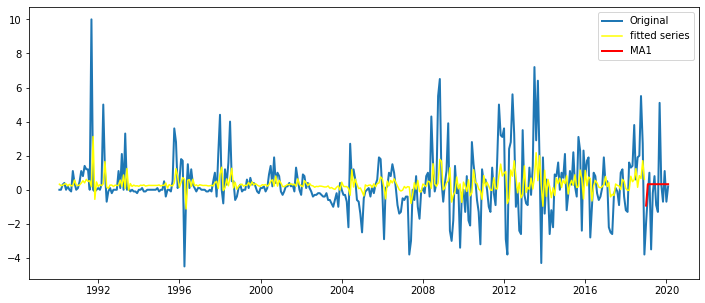

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(mydatats.INR_diff, linewidth = 2, label = "Original")
plt.plot(result_ma1.fittedvalues, color='yellow',label='fitted series')
plt.plot(forecast_ma1, linewidth = 2, color = "red", label = "MA1")
plt.legend()
plt.show()